# Final - 1 WebScraping with Beautiful Soup of DCI Mueseum

Using Beautiful Soup 4

Import required libraries:

In [161]:
import requests
import re
from bs4 import BeautifulSoup
import pandas as pd

# Dictionary Corps:ID

In [666]:
#make a dict of corps names to their id
page = requests.get("http://www.dcxmuseum.org/repertoire_display.cfm?ReturnAll=Y&RepYear=2019&Decade=2010")
soup = BeautifulSoup(page.content, 'html.parser')

tags = soup.find_all('a')
corpsids = {}
for tag in tags:
    attr = tag.attrs['href']
    if 'corpsid' in attr:
        attr = re.sub('.*corpsid=','',attr)
        attr = re.sub('&.*','',attr)
        corpsids[tag.string]=attr

corpsids #dict of corps_name:corps_id

{'Blue Devils': '17',
 'Bluecoats': '32',
 'Santa Clara Vanguard': '3',
 'Carolina Crown': '43',
 'The Cavaliers': '9',
 'Boston Crusaders': '37',
 'Blue Knights': '34',
 'Blue Stars': '2',
 'The Cadets': '21',
 'Mandarins': '48',
 'Crossmen': '25',
 'Phantom Regiment': '19',
 'Spirit of Atlanta': '26',
 'Pacific Crest': '108',
 'The Academy': '1455',
 'Colts': '36',
 'Madison Scouts': '13',
 'Troopers': '6',
 'Spartans': '66',
 'Genesis': '1645',
 'Legends': '1612',
 'Gold': '1572',
 'Music City': '1624',
 'Jersey Surf': '93',
 'Seattle Cascades': '125',
 'Louisiana Stars': '1765',
 'Southwind': '40',
 'River City Rhythm': '1781',
 'Guardians': '1749',
 '7th Regiment': '1403',
 'Golden Empire': '1764',
 'Shadow': '1821',
 'Colt Cadets': '80',
 'Les Stentors': '177',
 'Raiders': '116',
 'Heat Wave ': '1777',
 'Blue Devils B': '71',
 'Blue Devils C': '70',
 'Columbians': '1748',
 'Encorps': '2663',
 'Impulse': '497',
 'Incognito': '1617',
 'Oregon Crusaders': '670',
 'The Battalion': '1

In [690]:
#make a list of corps_names and a list of corps_ids
clist = list(corpsids.keys())
cidlist = list(corpsids.values())
print('Corps IDs: \n',cidlist)
print('\nCorps List: \n',clist)
#print('\nDictionary of Corps and Ids:\n',corpsids)

Corps IDs: 
 ['17', '32', '3', '43', '9', '37', '34', '2', '21', '48', '25', '19', '26', '108', '1455', '36', '13', '6', '66', '1645', '1612', '1572', '1624', '93', '125', '1765', '40', '1781', '1749', '1403', '1764', '1821', '80', '177', '116', '1777', '71', '70', '1748', '2663', '497', '1617', '670', '1816', '398', '1653', '1766', '1851', '1971', '1853', '2299', '1856', '2527', '2104', '1857', '2638', '1858', '2117', '1868', '1775', '1867', '2094', '3001', '1956', '1988', '1954', '555', '1272', '2578', '98']

Corps List: 
 ['Blue Devils', 'Bluecoats', 'Santa Clara Vanguard', 'Carolina Crown', 'The Cavaliers', 'Boston Crusaders', 'Blue Knights', 'Blue Stars', 'The Cadets', 'Mandarins', 'Crossmen', 'Phantom Regiment', 'Spirit of Atlanta', 'Pacific Crest', 'The Academy', 'Colts', 'Madison Scouts', 'Troopers', 'Spartans', 'Genesis', 'Legends', 'Gold', 'Music City', 'Jersey Surf', 'Seattle Cascades', 'Louisiana Stars', 'Southwind', 'River City Rhythm', 'Guardians', '7th Regiment', 'Golden

# List of Years to Scrape (as string)

In [4]:
#make a list of years 2000-2019
ylist= []
for year in range (2000,2020): 
    ylist.append(year)
    
ylist = list(map(str,ylist)) #format the list of int as a list of strings instead
print(ylist)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']



# Final Scores - Range of Years, All Corps

In [5]:
#finals scores for range of years 2000-2019
#change decade
l_final=[] #list of final scores
for year in ylist:
    decade = str(int(int(year)/10)*10) #converting from string to int, then casting a decimal back to int again, floors it.
    page = requests.get("http://www.dcxmuseum.org/repertoire_display.cfm?ReturnAll=Y&RepYear="+year+"&Decade="+decade)
    soup = BeautifulSoup(page.content, 'html.parser')
    stop=len(soup.find_all('td'))-1
    
    for x in range(1,stop,4):
        if soup.find_all("td")[x].text.strip('\n') == 'Senior':
            break
        l_final.append((
        soup.find_all("td")[x].text.strip('\n'),#corps
        year,
        soup.find_all("td")[x+1].text.strip('\n'),#rank
        soup.find_all("td")[x+2].text.strip('\n'),#score
        re.sub('[\n\t*-]', '', soup.find_all('td')[x+3].text).split('\r')[0:1],#show
        re.sub('[\n\t*]', '', soup.find_all('td')[x+3].text).split('\r')[1:-3]#songs
        ))
df_final = pd.DataFrame(l_final, columns=('Corps','Year','Rank','Final Score','Show','Songs'))
df_final

Corps  Year Rank Final Score                        Show  \
0               The Cadets  2000    1      97.650        [We are the Future ]   
1            The Cavaliers  2000    1      97.650            [Niagara Falls ]   
2              Blue Devils  2000    3      96.900       [Methods of Madness ]   
3     Santa Clara Vanguard  2000    4      94.700     [The Age of Reverence ]   
4         Boston Crusaders  2000    5      92.350                      [RED ]   
...                    ...   ...  ...         ...                         ...   
1071      Oregon Crusaders  2019                             [Corps inactive]   
1072         The Battalion  2019                                  [Humanity ]   
1073       Vanguard Cadets  2019                             [What About Us ]   
1074                Vessel  2019                   [Here, There, Everywhere ]   
1075              Watchmen  2019                          [Gods of the Nile ]   

                                                  Songs  
0     [Tapestry Of Nations (Prologue from Mov. III o...  
1                [Niagara Falls,  Original Composition]  
2     [A Night Piece For Orchestra..Prelude & Blues ...  
3     [Prayers of Kierkegaard, Prayer No. 4,  String...  
4     [Bolero,  Intensity,  Time To Say Goodbye,  Da...  
...                                                 ...  
1071                                                 []  
1072  [Shenandoah,  Many Languages, One World,  Sunk...  
1073  [What About Us,  Primacy of Number (from Naqoy...  
1074  [Theme from Super 8,  The Phoenix,  Rewrite th...  
1075                                 [Gods of the Nile]  

[1076 rows x 6 columns]


# Season Scores - Range of Years, All Corps

In [6]:
#Runs for a while
#All junior corps show scores over 20 years
l_season=[]
for corps in clist:
    for year in ylist:
        page = requests.get("http://www.dcxmuseum.org/Corpslist_ScoreYear.cfm?ReturnAll=Y&CorpsID="+corpsids[corps]+"&CorpsYear="+year+"&ShowID=0")
        soup = BeautifulSoup(page.content, 'html.parser')
        stop=len(soup.find_all('td')) #use len to find the stopping point of the loop

        for x in range(0,stop,4):
            l_season.append((
            corps,
            soup.find_all("td")[x].text, #show date
            year,
            re.sub('\n',', ',soup.find_all("td")[x+1].text), #show details
            soup.find_all("td")[x+2].text, #show position
            re.sub('\r\n\t\t','',soup.find_all("td")[x+3].text).strip() #show score
            ))
        
df_season = pd.DataFrame(l_season, columns=('Corps','Date','Year','Show','Position','Show_Score'))
df_season

Corps         Date  Year  \
0                       Blue Devils      June 17  2000   
1                       Blue Devils      June 23  2000   
2                       Blue Devils      June 24  2000   
3                       Blue Devils      June 25  2000   
4                       Blue Devils      July 21  2000   
...                             ...          ...   ...   
17476  Freelancers Alumni Minicorps      June 24  2018   
17477  Freelancers Alumni Minicorps    August 31  2018   
17478  Freelancers Alumni Minicorps  September 2  2018   
17479  Freelancers Alumni Minicorps    August 30  2019   
17480  Freelancers Alumni Minicorps  September 1  2019   

                                                    Show Position Show_Score  
0                             , Concord CA , DCI-Pacific        1     73.550  
1                            , Glendora CA , DCI Pacific        1     79.000  
2                           , Riverside CA , DCI Pacific        1     80.050  
3                          , Costa Mesa CA , DCI Pacific        1     80.800  
4                                 , Des Plaines IL , DCI        1     88.600  
...                                                  ...      ...        ...  
17476  Moonlight Classic, Sacramento CA United States...        0             
17477  I&E and Mini Corps, Williamsport PA United Sta...        2     94.667  
17478  Alumni Spectacular, Williamsport PA United Sta...        0             
17479  I&E and Mini Corps, Williamsport PA United Sta...        1     97.170  
17480  Alumni Spectacular, Williamsport PA United Sta...        0             

[17481 rows x 6 columns]

# Corps Hometown Scrape

In [697]:
#scrape corps home town
page = requests.get("http://www.dcxmuseum.org/index.cfm?roomid=105&view=corps&option=junior")
soup = BeautifulSoup(page.content, 'html.parser')
stop=len(soup.find_all('td'))-1
chome = []
for x in range(5,stop,5):
    chome.append((
    soup.find_all("td")[x].text.strip('\n'),#corps
    re.sub('[\n\t\r]', '', soup.find_all('td')[x+2].text),#town
    re.sub('[\n\t\r ]', '', soup.find_all('td')[x+3].text)#state
    ))
df_chome = pd.DataFrame(chome, columns=('Corps','City','State'))
df_chome=df_chome[df_chome['Corps'].isin(clist)]
df_chome

Corps                                   City State
14            7th Regiment                            New London     CT
122            Blue Devils                               Concord     CA
123          Blue Devils B                               Concord     CA
124          Blue Devils C                               Concord     CA
125           Blue Knights                                Denver     CO
134             Blue Stars                              LaCrosse     WI
136              Bluecoats                                Canton     OH
146       Boston Crusaders                                Boston     MA
205         Carolina Crown                             Fort Mill     SC
253            Colt Cadets                               Dubuque     IA
254                  Colts                               Dubuque     IA
255             Columbians                                 Pasco     WA
291               Crossmen                           San Antonio     TX
376                Encorps                       South Brunswick     NJ
446                Genesis                                Austin     TX
453                   Gold                 Oceanside / San Diego     CA
462          Golden Empire                           Bakersfield     CA
489              Guardians                     Dallas-Fort Worth     TX
548                Impulse                            Buena Park     CA
550              Incognito                 Brea and Garden Grove     CA
573            Jersey Surf                                Berlin     NJ
644                Legends                             Kalamazoo     MI
722           Les Stentors                            Sherbrooke    QUE
755        Louisiana Stars                             Lafayette     LA
763         Madison Scouts                               Madison     WI
778              Mandarins                            Sacramento     CA
858             Music City                             Nashville     TN
915       Oregon Crusaders                              Portland     OR
927          Pacific Crest                           Diamond Bar     CA
963       Phantom Regiment                              Rockford     IL
1028               Raiders                            Burlington     NJ
1062     River City Rhythm                                 Anoka     MN
1105  Santa Clara Vanguard                           Santa Clara     CA
1120      Seattle Cascades                             Shoreline     WA
1131                Shadow                                Oregon     WI
1171             Southwind                                Mobile     AL
1176              Spartans                                Nashua     NH
1183     Spirit of Atlanta                               Atlanta     GA
1303           The Academy                                 Tempe     AZ
1304         The Battalion                        Salt Lake City     UT
1305            The Cadets                             Allentown     PA
1306         The Cavaliers                              Rosemont     IL
1334              Troopers                                Casper     WY
1352       Vanguard Cadets                           Santa Clara     CA
1362                Vessel  Inland Empire of Southern California     CA
1389              Watchmen                             Riverside     CA

In [698]:
#added a lat/long column (initially set to 0)
df_chome.insert(3,'Latitude',0)
df_chome.insert(4,'Longitude',0)

In [699]:
#update lat/long using geopy library
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="x2x")

for index,row in df_chome.iterrows():
    location = geolocator.geocode(row['City'] + row['State'])
    #error handling for unknown geolocation lookups
    if location is None:
        df_chome.loc[index,['Latitude','Longitude']]=[0,0]
    else:
        df_chome.loc[index,['Latitude','Longitude']]=[location.latitude, location.longitude]
df_chome  

Corps                                   City State  \
14            7th Regiment                            New London     CT   
122            Blue Devils                               Concord     CA   
123          Blue Devils B                               Concord     CA   
124          Blue Devils C                               Concord     CA   
125           Blue Knights                                Denver     CO   
134             Blue Stars                              LaCrosse     WI   
136              Bluecoats                                Canton     OH   
146       Boston Crusaders                                Boston     MA   
205         Carolina Crown                             Fort Mill     SC   
253            Colt Cadets                               Dubuque     IA   
254                  Colts                               Dubuque     IA   
255             Columbians                                 Pasco     WA   
291               Crossmen                           San Antonio     TX   
376                Encorps                       South Brunswick     NJ   
446                Genesis                                Austin     TX   
453                   Gold                 Oceanside / San Diego     CA   
462          Golden Empire                           Bakersfield     CA   
489              Guardians                     Dallas-Fort Worth     TX   
548                Impulse                            Buena Park     CA   
550              Incognito                 Brea and Garden Grove     CA   
573            Jersey Surf                                Berlin     NJ   
644                Legends                             Kalamazoo     MI   
722           Les Stentors                            Sherbrooke    QUE   
755        Louisiana Stars                             Lafayette     LA   
763         Madison Scouts                               Madison     WI   
778              Mandarins                            Sacramento     CA   
858             Music City                             Nashville     TN   
915       Oregon Crusaders                              Portland     OR   
927          Pacific Crest                           Diamond Bar     CA   
963       Phantom Regiment                              Rockford     IL   
1028               Raiders                            Burlington     NJ   
1062     River City Rhythm                                 Anoka     MN   
1105  Santa Clara Vanguard                           Santa Clara     CA   
1120      Seattle Cascades                             Shoreline     WA   
1131                Shadow                                Oregon     WI   
1171             Southwind                                Mobile     AL   
1176              Spartans                                Nashua     NH   
1183     Spirit of Atlanta                               Atlanta     GA   
1303           The Academy                                 Tempe     AZ   
1304         The Battalion                        Salt Lake City     UT   
1305            The Cadets                             Allentown     PA   
1306         The Cavaliers                              Rosemont     IL   
1334              Troopers                                Casper     WY   
1352       Vanguard Cadets                           Santa Clara     CA   
1362                Vessel  Inland Empire of Southern California     CA   
1389              Watchmen                             Riverside     CA   

       Latitude   Longitude  
14    36.228085 -115.326849  
122   37.976852 -122.033562  
123   37.976852 -122.033562  
124   37.976852 -122.033562  
125   39.739236 -104.984862  
134   43.904302  -91.104106  
136   40.798546  -81.374951  
146   42.355433  -71.060511  
205   35.007370  -80.945076  
253   42.500624  -90.664799  
254   42.500624  -90.664799  
255   46.230674 -119.092100  
291   29.424600  -98.495141  
376   40.381873  -74.531766  
446   30.271129  -97.743700  
453   33.195870

# SQLite

In [691]:
import sqlite3

### DB Table lookup

In [748]:
#look at tables in given database
database = 'dci.db'
connection = sqlite3.connect(database)
cursor = connection.execute('SELECT name FROM sqlite_schema WHERE type=\'table\' ORDER BY name')
for row in cursor:
    print(row)

('cc_season_scores',)
('final_scores',)
('jr_corps_hometown',)
('season_scores',)


In [749]:
#how to drop table
database = 'dci.db'
connection = sqlite3.connect(database)
cursor = connection.execute('drop table final_scores')

In [752]:
#Query
connection = sqlite3.connect('dci.db')
cursor = connection.execute("""select corps, year, final_score 
    from final_scores
    where rank=1
    """)
for row in cursor:
    print(row)

### 1 Table for Final Scores

In [750]:
connection = sqlite3.connect('dci.db')
connection.execute(''' CREATE TABLE final_scores
        (Corps VARCHAR NOT NULL,
        Year INT NOT NULL,
        Rank INT,
        Final_Score FLOAT,
        Show VARCHAR,
        Songs VARCHAR);
        ''')
#for each row in df_final, insert into table
for index, row in df_final.iterrows():
    song_str = ''
    for song in row['Songs']:
       song_str = song_str+' '+song
    connection.execute("insert into final_scores (Corps, Year, Rank, Final_Score, Show, Songs) values (?,?,?,?,?,?)",
                       (row['Corps'], row['Year'], row['Rank'], row['Final Score'], row['Show'][0], song_str))

#send to csv
import csv
cursor = connection.execute('select * from final_scores')
rows = cursor.fetchall()
fp = open('final_scores.csv', 'w')
myFile = csv.writer(fp)
myFile.writerow(['Corps','Year','Rank','Final Score','Show','Songs'])
myFile.writerows(rows)
fp.close()
#connection.close()

### 2 Table for Season Scores

In [694]:
connection = sqlite3.connect('dci.db')
connection.execute(''' CREATE TABLE season_scores 
        (Corps VARCHAR NOT NULL,
        Date DATE,
        Year INT NOT NULL,
        Show VARCHAR,
        Position INT,
        Show_Score FLOAT);
        ''')
#for each row in df_season, insert into table
for index, row in df_season.iterrows():
    connection.execute("insert into season_scores (Corps, Date, Year, Show, Position, Show_Score) values (?,?,?,?,?,?)",
                       (row['Corps'], row['Date'], row['Year'], row['Show'], row['Position'], row['Show_Score']))
    
    
#send to csv
import csv
cursor = connection.execute('select * from season_scores where Position != 0 ')
rows = cursor.fetchall()
fp = open('season_scores.csv', 'w')
myFile = csv.writer(fp)
myFile.writerow(['Corps','Date','Year','Show','Position','Show_Score'])
myFile.writerows(rows)
fp.close()
#connection.close()

### 3 Corps Hometown Table

In [705]:
#Corps city,state
connection = sqlite3.connect('dci.db')
connection.execute(''' CREATE TABLE jr_corps_hometown 
        (Corps VARCHAR NOT NULL,
        City VARCHAR,
        State VARCHAR,
        Latitude FLOAT,
        Longitude FLOAT);
        ''')

for index, row in df_chome.iterrows():
    connection.execute("insert into jr_corps_hometown (Corps, City, State,Latitude,Longitude) values (?,?,?,?,?)",
                       (row['Corps'], row['City'], row['State'], row['Latitude'], row['Longitude']))
    
import csv
cursor = connection.execute('select * from jr_corps_hometown')
rows = cursor.fetchall()
fp = open('jr_corps_hometown.csv', 'w')
myFile = csv.writer(fp)
myFile.writerow(['Corps','City','State', 'Latitude','Longitude'])
myFile.writerows(rows)
fp.close()
#connection.close()

### 4 Carolina Crown All Season Scores Table

In [707]:
# Crown Season scores CSV
connection = sqlite3.connect('dci.db')
connection.execute(''' CREATE TABLE cc_season_scores 
        (Corps VARCHAR NOT NULL,
        Date DATE,
        Year INT NOT NULL,
        Position INT,
        Show_Score FLOAT);
        ''')

#for each row in df_season, insert into table
for index, row in df_season.iterrows():
    connection.execute("insert into cc_season_scores (Corps, Date, Year, Position, Show_Score) values (?,?,?,?,?)",
                       (row['Corps'], row['Date'], row['Year'], row['Position'], row['Show_Score']))
    
    
import csv
cursor = connection.execute('select * from cc_season_scores where corps="Carolina Crown"')
rows = cursor.fetchall()
fp = open('cc_season.csv', 'w')
myFile = csv.writer(fp)
myFile.writerow(['Corps','Date','Year','Position','Show_Score'])
myFile.writerows(rows)
fp.close()
#connection.close()

# MAP visualization


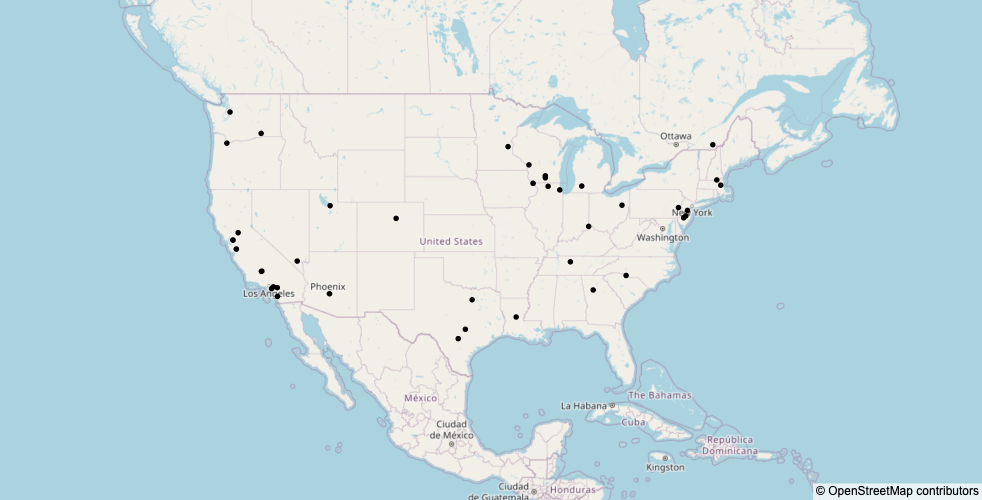

In [733]:
#pip install geopy
import geopy as gpy
import pandas as pd
cities = pd.read_csv('jr_corps_hometown.csv')

import plotly.express as px

fig = px.scatter_mapbox(cities, lat="Latitude", lon="Longitude", hover_name="City", hover_data=["Corps", "City"],
                        color_discrete_sequence=["black"], zoom=2.75, height=500)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Plotting in Matplotlib/Seaborn


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import pandas as pd

In [621]:
#2 ways to set figsize
sns.set(rc={'figure.figsize':(12.5,9)})
plt.figure(figsize=(20,25))

<Figure size 1440x1800 with 0 Axes>

<Figure size 1440x1800 with 0 Axes>

In [587]:
corpslist = ['The Cadets', 'The Cavaliers','Blue Devils','Phantom Regiment','Carolina Crown','Santa Clara Vanguard', 'Bluecoats']

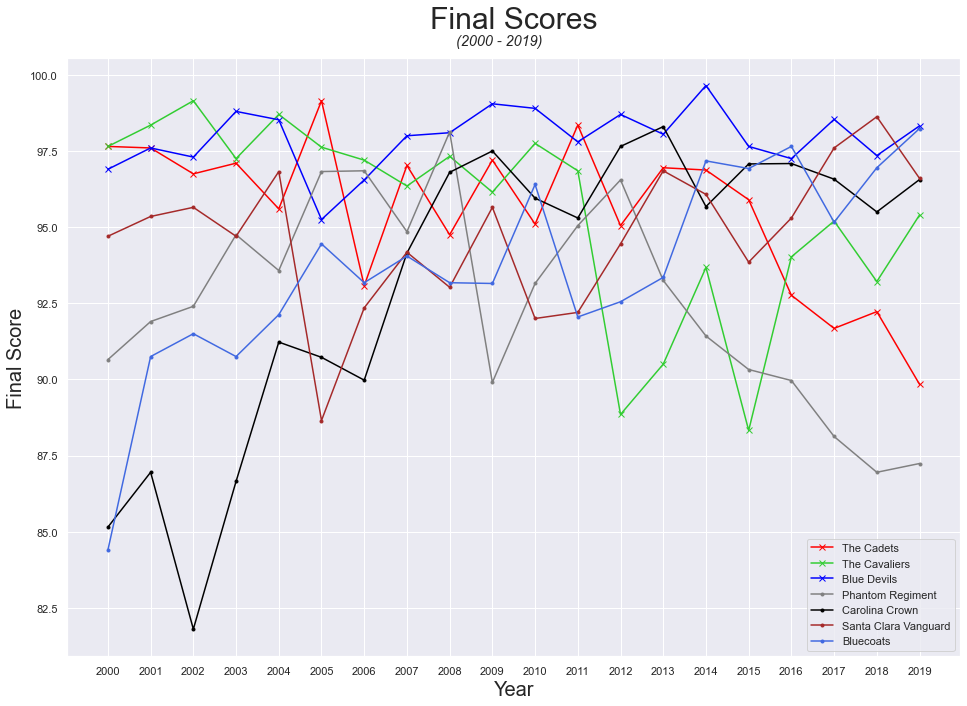

In [633]:
#top 7 groups
sns.set(rc={'figure.figsize':(16,11)})
plt.title('Final Scores',pad=30,fontsize=30)
plt.suptitle('(2000 - 2019)',y=.91,style='italic')
plt.yticks(np.arange(80, 101, step=2.5))
plt.ylabel('Final Score',fontsize=20)
plt.xlabel('Year',fontsize=20)

#cadets
corps = df_final.query('Corps == '+"'"+corpslist[0]+"'")
corps = corps.astype({'Final Score':'float'})
plt.plot('Year','Final Score',data=corps, marker = 'x', c='red')

#cavaliers
corps = df_final.query('Corps == '+"'"+corpslist[1]+"'")
corps = corps.astype({'Final Score':'float'})
plt.plot('Year','Final Score',data=corps, marker = 'x', c='limegreen')

#blue devils
corps = df_final.query('Corps == '+"'"+corpslist[2]+"'")
corps = corps.astype({'Final Score':'float'})
plt.plot('Year','Final Score',data=corps, marker = 'x', c='blue')

#phantom
corps = df_final.query('Corps == '+"'"+corpslist[3]+"'")
corps = corps.astype({'Final Score':'float'})
plt.plot('Year','Final Score',data=corps, marker = '.', c='grey')

#Carolina Crown
corps = df_final.query('Corps == '+"'"+corpslist[4]+"'")
corps = corps.astype({'Final Score':'float'})
plt.plot('Year','Final Score',data=corps, marker = '.', c='black')

#vanguard
corps = df_final.query('Corps == '+"'"+corpslist[5]+"'")
corps = corps.astype({'Final Score':'float'})
plt.plot('Year','Final Score',data=corps, marker = '.', c='brown')

#bluecoats
corps = df_final.query('Corps == '+"'"+corpslist[6]+"'")
corps = corps.astype({'Final Score':'float'})
plt.plot('Year','Final Score',data=corps, marker = '.', c='royalblue')




plt.legend(labels=[corpslist[0],corpslist[1],corpslist[2],corpslist[3],corpslist[4],corpslist[5],corpslist[6]],
           loc='lower right')

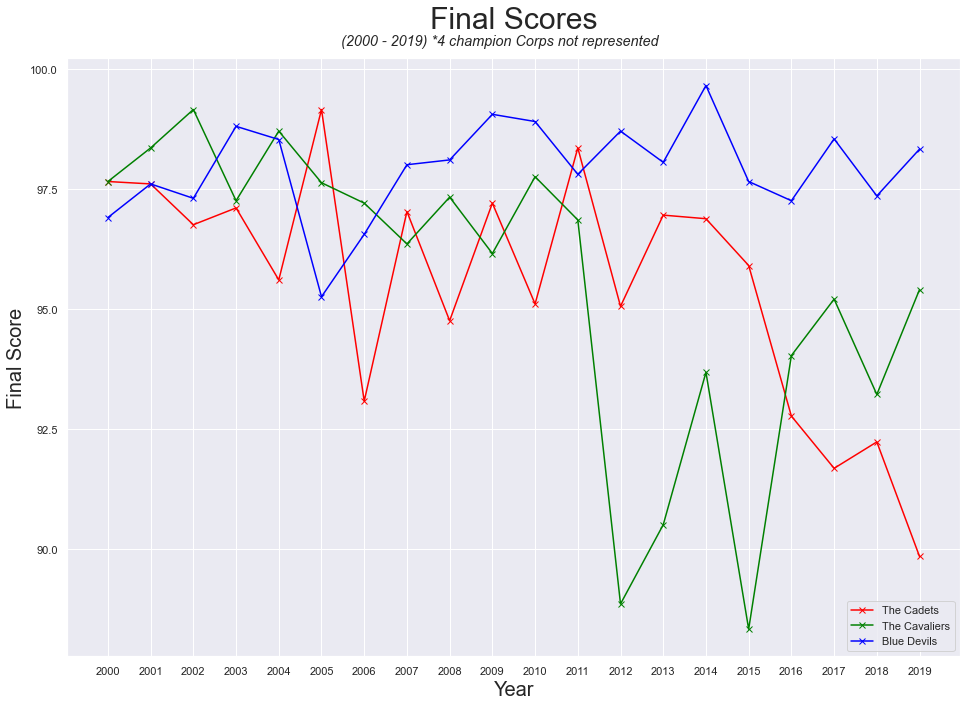

In [662]:
#Top 3 groups
sns.set(rc={'figure.figsize':(16,11)})
plt.title('Final Scores',pad=30,fontsize=30)
plt.suptitle('(2000 - 2019) *4 champion Corps not represented',y=.91,style='italic')
plt.yticks(np.arange(80, 101, step=2.5))
plt.ylabel('Final Score',fontsize=20)
plt.xlabel('Year',fontsize=20)

#cadets
corps = df_final.query('Corps == '+"'"+corpslist[0]+"'")
corps = corps.astype({'Final Score':'float'})
plt.plot('Year','Final Score',data=corps, marker = 'x', c='red')

#cavaliers
corps = df_final.query('Corps == '+"'"+corpslist[1]+"'")
corps = corps.astype({'Final Score':'float'})
plt.plot('Year','Final Score',data=corps, marker = 'x', c='green')

#blue devils
corps = df_final.query('Corps == '+"'"+corpslist[2]+"'")
corps = corps.astype({'Final Score':'float'})
plt.plot('Year','Final Score',data=corps, marker = 'x', c='blue')

plt.legend(labels=[corpslist[0],corpslist[1],corpslist[2],corpslist[3],corpslist[4],corpslist[5],corpslist[6]],
           loc='lower right')

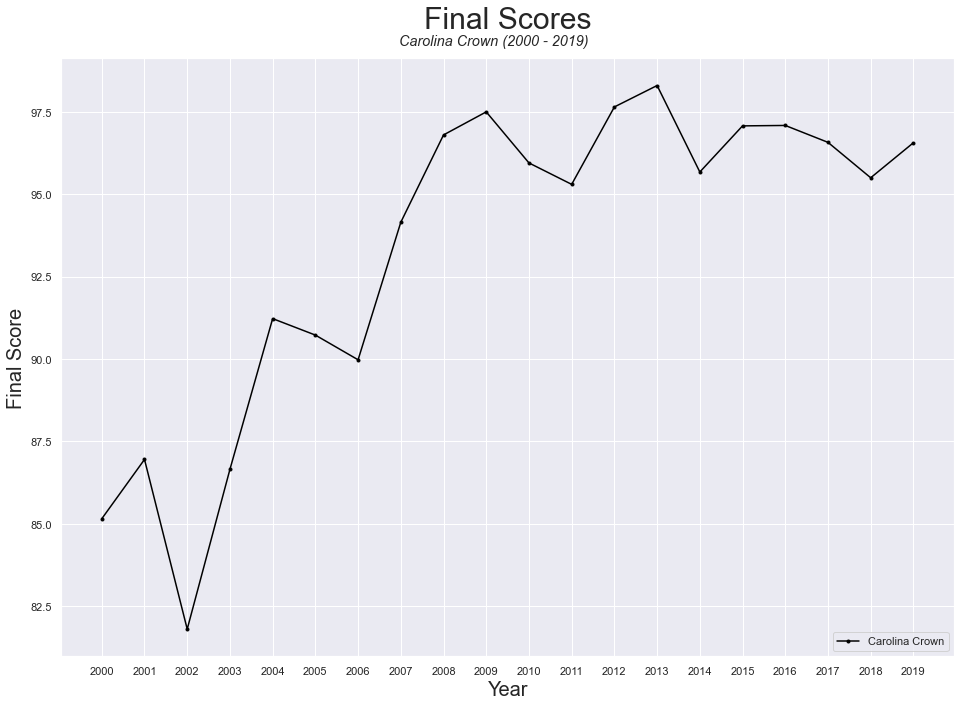

In [646]:
#1 hit wonders
fig, ax = plt.subplots(figsize=(16,11))
#sns.set(rc={'figure.figsize':(10,10)})
plt.title('Final Scores',pad=30,fontsize=30)
plt.suptitle(corpslist[cnum]+' (2000 - 2019)',y=.91,style='italic')
plt.yticks(np.arange(80, 101, step=2.5))
plt.ylabel('Final Score',fontsize=20)
plt.xlabel('Year',fontsize=20)


#Carolina Crown
cnum = 4
corps = df_final.query('Corps == '+"'"+corpslist[cnum]+"'")
corps = corps.astype({'Final Score':'float'})
plt.plot('Year','Final Score',data=corps, marker = '.', c='black')

plt.legend(labels=[corpslist[cnum]],
           loc='lower right')

# Season Scores Visualizations


In [124]:
from datetime import datetime

In [652]:
corps['Date'] = pd.to_datetime(corps['Date'], format='%B %d')

In [263]:
corps['Date']

1793   1900-08-10
1794   1900-08-10
1795   1900-08-10
1796   1900-08-10
1797   1900-08-10
          ...    
2426   1900-08-10
2427   1900-08-10
2428   1900-08-10
2429   1900-08-10
2430   1900-08-10
Name: Date, Length: 601, dtype: datetime64[ns]

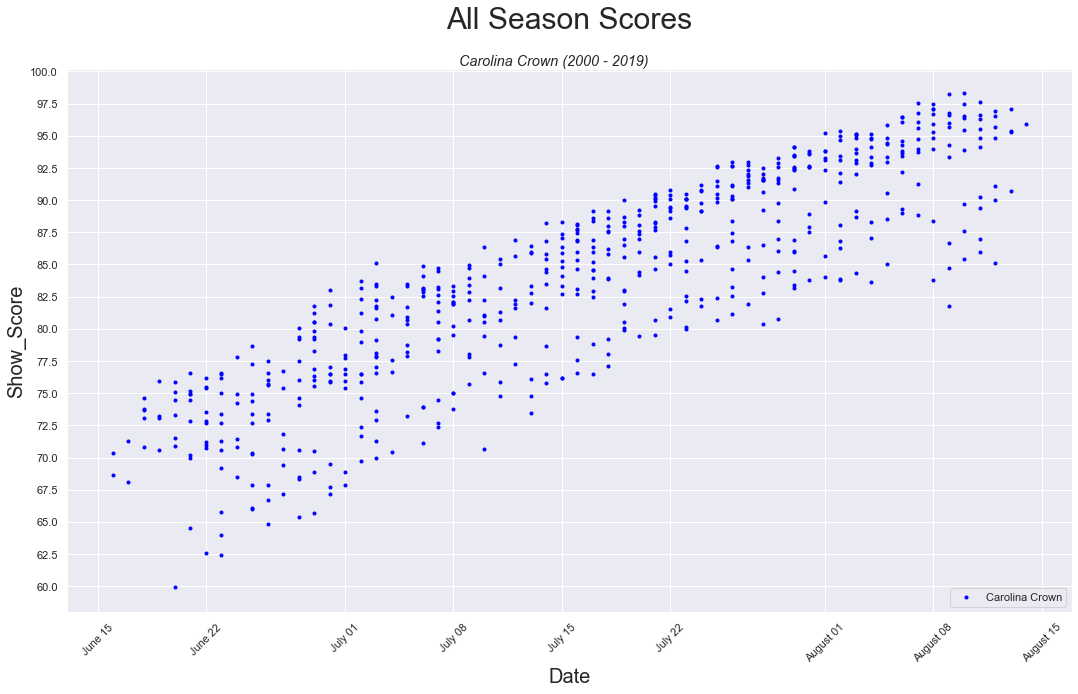

In [656]:
#crown

fig, ax = plt.subplots(figsize=(18,10))
date_form = DateFormatter("%B %d")
ax.xaxis.set_major_formatter(date_form)

plt.title('All Season Scores',pad=40,fontsize=30)
plt.suptitle('Carolina Crown (2000 - 2019)',y=.9,style='italic')
plt.yticks(np.arange(50, 101, step=2.5))
plt.ylabel('Show_Score',fontsize=20)
plt.xticks(rotation=45)
plt.xlabel('Date',fontsize=20)

#Carolina Crown
corps = df_season.query('Corps == "Carolina Crown" & Year <"2020"')
corps['Date'] = pd.to_datetime(corps['Date'], format='%B %d')
corps = corps[corps['Show_Score'] != ''] #remove rows with nothing for Show_Score
corps = corps.astype({'Show_Score':'float'})
corps = corps[corps['Show_Score'] !=0] #remove rows with 0 for Show_Score
plt.scatter('Date','Show_Score',data=corps, marker = '.', c='blue')

plt.legend(labels=['Carolina Crown'],
           loc='lower right')

In [ ]:
#double check the average score on target date (run the below cell before this one)
corpsdate = corps.query('Date =="1900-8-11"') #6/16 to 8/14
corpsdate['Show_Score'].mean()

In [650]:
#Carolina Crown average score each day over 20 years
corps = df_season.query('Corps == "Carolina Crown" & Year <"2020"')
corps['Date'] = pd.to_datetime(corps['Date'], format='%B %d')
corps = corps[corps['Show_Score'] != ''] #remove rows with nothing for Show_Score
corps = corps.astype({'Show_Score':'float'})
corps = corps[corps['Show_Score'] !=0] #remove rows with 0 for Show_Score

crown_avg_daily=corps.groupby(['Date']).mean().reset_index()
crown_avg_daily.head()

Date  Show_Score
0 1900-06-16   69.500000
1 1900-06-17   69.700000
2 1900-06-18   73.205000
3 1900-06-19   73.212500
4 1900-06-20   71.592857

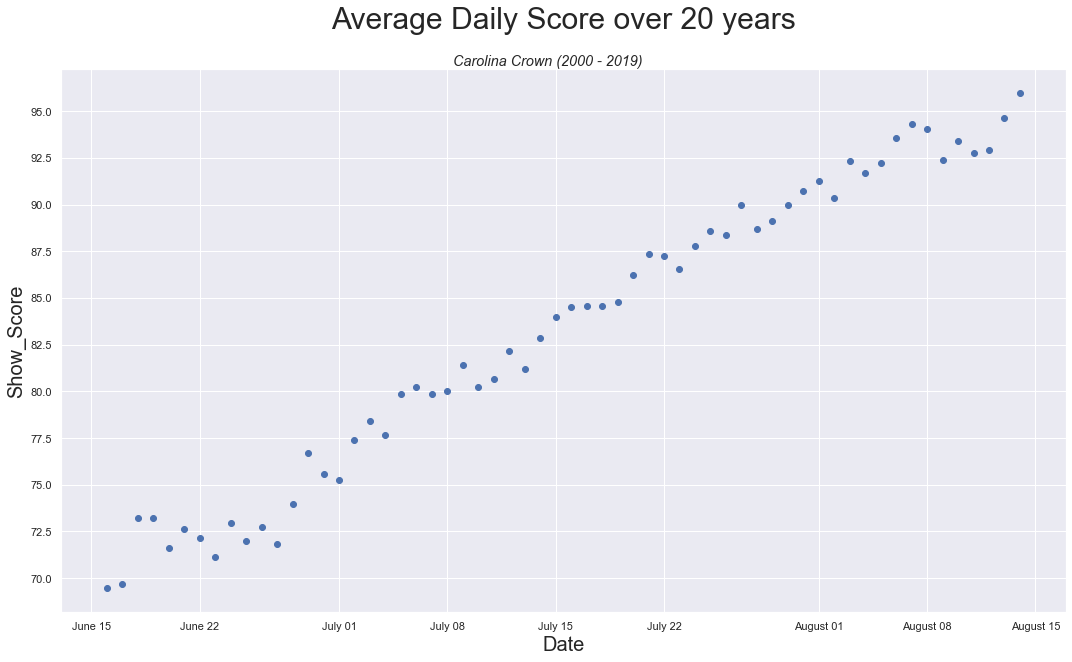

In [651]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
#Crown by average score per day over 20 years
fig, ax = plt.subplots(figsize=(18,10))
date_form = DateFormatter("%B %d")
ax.xaxis.set_major_formatter(date_form)
plt.title('Average Daily Score over 20 years',pad=40,fontsize=30)
plt.suptitle('Carolina Crown (2000 - 2019)',y=.9,style='italic')
plt.yticks(np.arange(50, 101, step=2.5))
plt.ylabel('Show_Score',fontsize=20)
plt.xlabel('Date',fontsize=20)


plt.scatter('Date','Show_Score',data=crown_avg_daily)

In [560]:
#Corps city,state
connection = sqlite3.connect('dciavg.db')
connection.execute(''' CREATE TABLE crown_averagedaily
        (Date VARCHAR,
        Show_Score FLOAT);
        ''')

for index, row in crown_avg_daily.iterrows():
    connection.execute("insert into crown_averagedaily (Date, Show_Score) values (?,?)",
                       (row['Date'], row['Show_Score']))
    
import csv
cursor = connection.execute('select * from crown_averagedaily')
rows = cursor.fetchall()
fp = open('crown_averagedaily.csv', 'w')
myFile = csv.writer(fp)
myFile.writerow(['Date','Show_Score'])
myFile.writerows(rows)
fp.close()
connection.close()

# Sunburst


In [276]:
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [735]:
df_final.head(1)

Corps  Year Rank Final Score                  Show  \
0  The Cadets  2000    1      97.650  [We are the Future ]   

                                               Songs  
0  [Tapestry Of Nations (Prologue from Mov. III o...

In [308]:
df_final = df_final[df_final['Final Score'] != ''] #remove rows with nothing for Show_Score
seaburst = df_final.astype({'Final Score':'float','Year':'int'})
seaburst.insert(5,'DCI','DCI')
seaburst

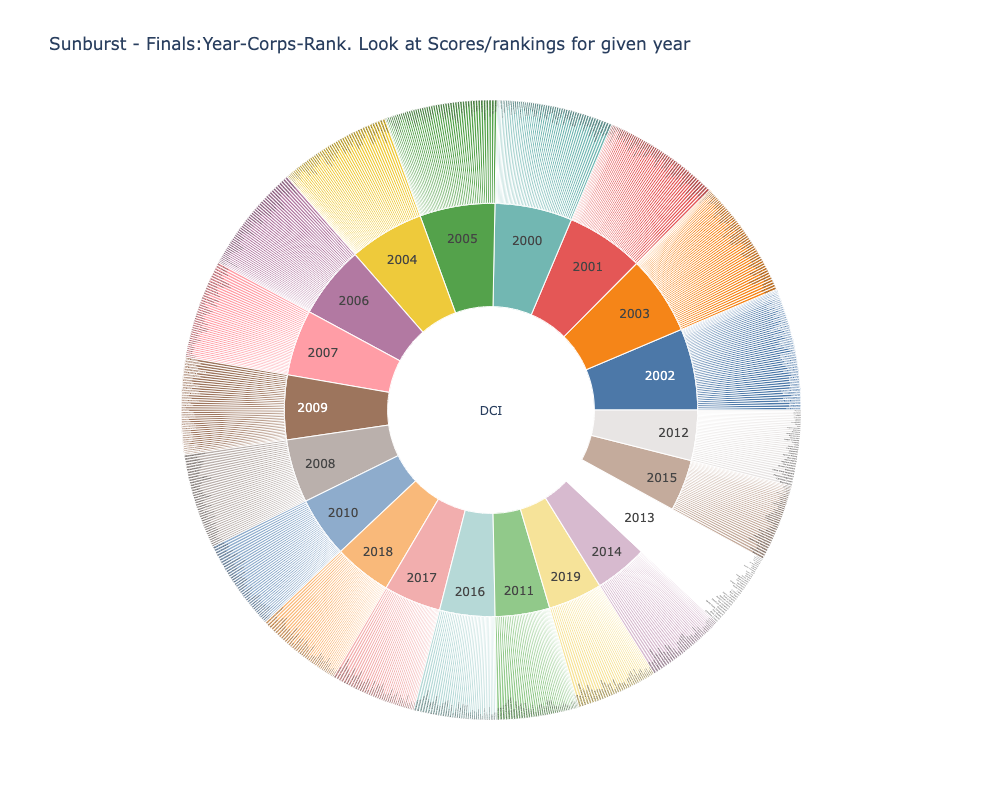

In [677]:
fig = px.sunburst(seaburst, 
                  path=['DCI','Year','Corps','Rank','Final Score'], 
                  values = 'Final Score',
                  title = 'Sunburst - Finals:Year-Corps-Rank. Look at Scores/rankings for given year',
                  hover_data=['Corps','Final Score','Rank'],
                  color_discrete_sequence=px.colors.qualitative.T10,
                  maxdepth=3,
                  width=1000,height=800)
fig.show()

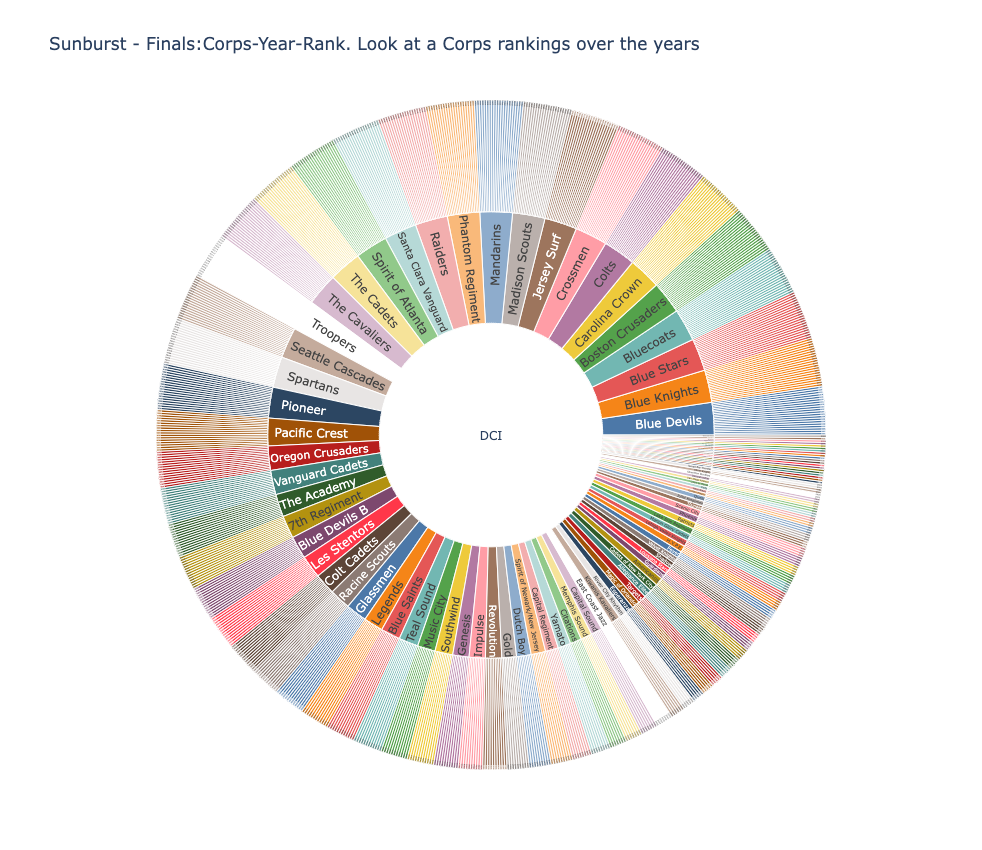

In [617]:
fig = px.sunburst(seaburst, 
                  path=['DCI','Corps','Year','Rank','Final Score'], 
                  values = 'Year',
                  title = 'Sunburst - Finals:Corps-Year-Rank. Look at a Corps rankings over the years',
                  hover_data=['Corps','Final Score','Rank'],
                  color_discrete_sequence=px.colors.qualitative.T10,
                  maxdepth=3,
                  width=1000,height=850)
fig.show()

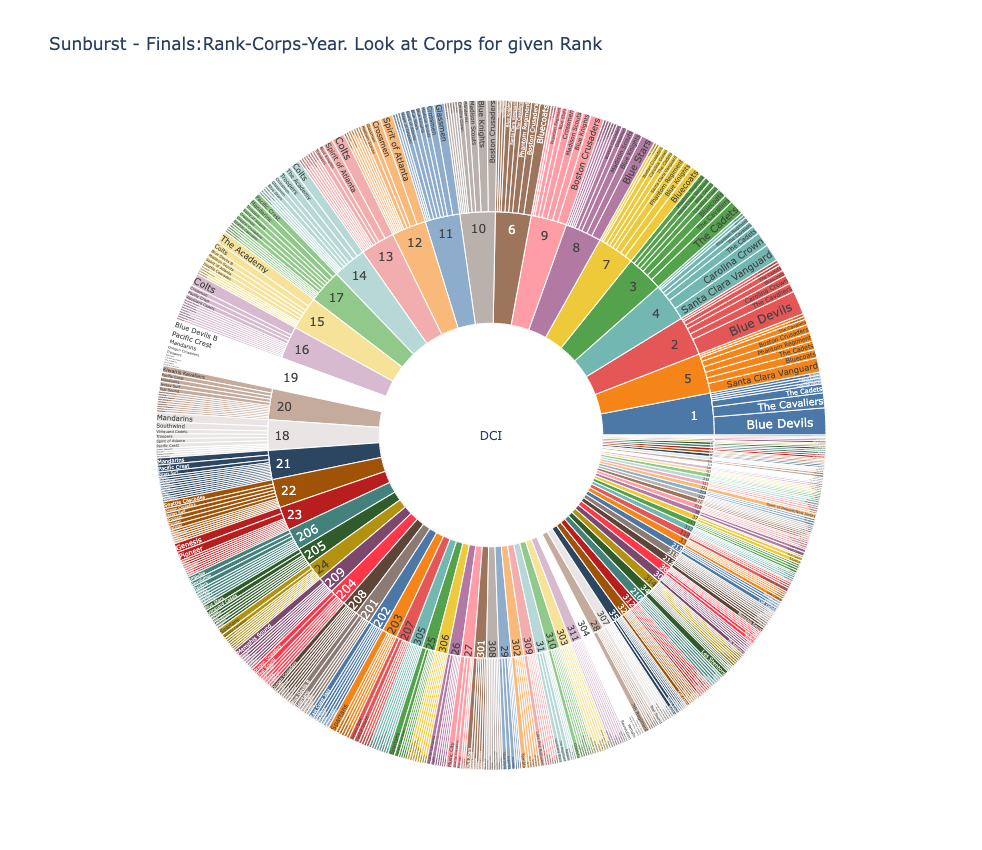

In [664]:
fig = px.sunburst(seaburst, 
                  path=['DCI','Rank','Corps','Year','Final Score'], 
                  values = 'Final Score',
                  title = 'Sunburst - Finals:Rank-Corps-Year. Look at Corps for given Rank',
                  hover_data=['Corps','Final Score','Rank'],
                  color_discrete_sequence=px.colors.qualitative.T10,
                  maxdepth=3,
                  width=1000,height=850)
fig.show()